In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 100)

In [3]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14486560918046994142
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10033331895610296590
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4230868979105740807
physical_device_desc: "device: XLA_GPU device"
]


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [5]:
xqrs = pd.read_csv('../to_csv/late_data/xqrs_3_late.csv').rename(columns={"Key(t-3)": "Key", 'label(t)': 'label'})
xqrs.head()

,Key,mean_nni(t-3),sdnn(t-3),sdsd(t-3),nni_50(t-3),pnni_50(t-3),nni_20(t-3),pnni_20(t-3),rmssd(t-3),median_nni(t-3),range_nni(t-3),cvsd(t-3),cvnni(t-3),mean_hr(t-3),max_hr(t-3),min_hr(t-3),std_hr(t-3),lf(t-3),hf(t-3),vlf(t-3),lf_hf_ratio(t-3),csi(t-3),cvi(t-3),Modified_csi(t-3),sampen(t-3),sd1(t-3),sd2(t-3),ratio_sd2_sd1(t-3),mean_nni(t-2),sdnn(t-2),sdsd(t-2),nni_50(t-2),pnni_50(t-2),nni_20(t-2),pnni_20(t-2),rmssd(t-2),median_nni(t-2),range_nni(t-2),cvsd(t-2),cvnni(t-2),mean_hr(t-2),max_hr(t-2),min_hr(t-2),std_hr(t-2),lf(t-2),hf(t-2),vlf(t-2),lf_hf_ratio(t-2),csi(t-2),cvi(t-2),...,nni_20(t-1),pnni_20(t-1),rmssd(t-1),median_nni(t-1),range_nni(t-1),cvsd(t-1),cvnni(t-1),mean_hr(t-1),max_hr(t-1),min_hr(t-1),std_hr(t-1),lf(t-1),hf(t-1),vlf(t-1),lf_hf_ratio(t-1),csi(t-1),cvi(t-1),Modified_csi(t-1),sampen(t-1),sd1(t-1),sd2(t-1),ratio_sd2_sd1(t-1),mean_nni(t),sdnn(t),sdsd(t),nni_50(t),pnni_50(t),nni_20(t),pnni_20(t),rmssd(t),median_nni(t),range_nni(t),cvsd(t),cvnni(t),mean_hr(t),max_hr(t),min_hr(t),std_hr(t),lf(t),hf(t),vlf(t),lf_hf_ratio(t),csi(t),cvi(t),Modified_csi(t),sampen(t),sd1(t),sd2(t),ratio_sd2_sd1(t),label
0,train_01_tcp_ar_8643_s002_t005,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,...,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
1,train_01_tcp_ar_8643_s002_t005,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,...,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
2,train_01_tcp_ar_8643_s002_t005,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,...,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.7016,0.517062,6.555356,19.970406,4.732654,674.665179,3.884728,2.403846,0.0,0.0,0.0,0.000000,2.422553,675.78125,11.71875,0.003591,0.005758,88.935746,89.824561,88.275862,0.494526,46.079051,5.06351,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
3,train_01_tcp_ar_8643_s002_t005,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.4285

In [6]:
train = xqrs[xqrs['Key'].str.match('train')]
dev = xqrs[xqrs['Key'].str.match('dev')]

In [7]:
X_train = train.iloc[:,2:-1]
y_train = train.iloc[:,-1:]

X_test = dev.iloc[:,2:-1]
y_test = dev.iloc[:,-1:]

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(172265, 107) (172265, 1) (39422, 107) (39422, 1)


In [9]:
y_train.label = y_train.label.apply(lambda x: 0 if x < 0.5 else 1)
y_test.label = y_test.label.apply(lambda x: 0 if x < 0.5 else 1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf

In [13]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(172265, 1, 107) (172265, 1) (39422, 1, 107) (39422, 1)


In [15]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [16]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [19]:
model = tf.keras.Sequential([

                  # Couche LSTM Bidirectionnelle
                  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
                  tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                  
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),  

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie 
                  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [20]:
LR = tf.keras.optimizers.schedules.ExponentialDecay(
    0.001, 2000, 0.96, True
)

In [21]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [23]:
# fit network
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
5384/5384 - 11s - loss: 0.2136 - tp: 0.0000e+00 - fp: 11.0000 - tn: 163182.0000 - fn: 9072.0000 - accuracy: 0.9473 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3845 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 35627.0000 - val_fn: 3795.0000 - val_accuracy: 0.9037 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
5384/5384 - 10s - loss: 0.2048 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 163193.0000 - fn: 9072.0000 - accuracy: 0.9473 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3768 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 35627.0000 - val_fn: 3795.0000 - val_accuracy: 0.9037 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
5384/5384 - 10s - loss: 0.2022 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 163193.0000 - fn: 9072.0000 - accuracy: 0.9473 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3546 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 35627.0000 - val_fn: 3795.0000 - val_accuracy: 0.9037 

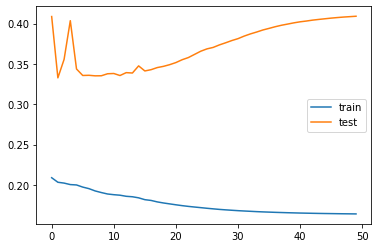

In [77]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [78]:
f1 = 2 * (np.array(history.history['precision']) *  np.array(history.history['recall'])) / (np.array(history.history['precision']) + np.array(history.history['recall']))

In [79]:
val_f1 = 2 * (np.array(history.history['val_precision']) *  np.array(history.history['val_recall'])) / (np.array(history.history['val_precision']) + np.array(history.history['val_recall']))

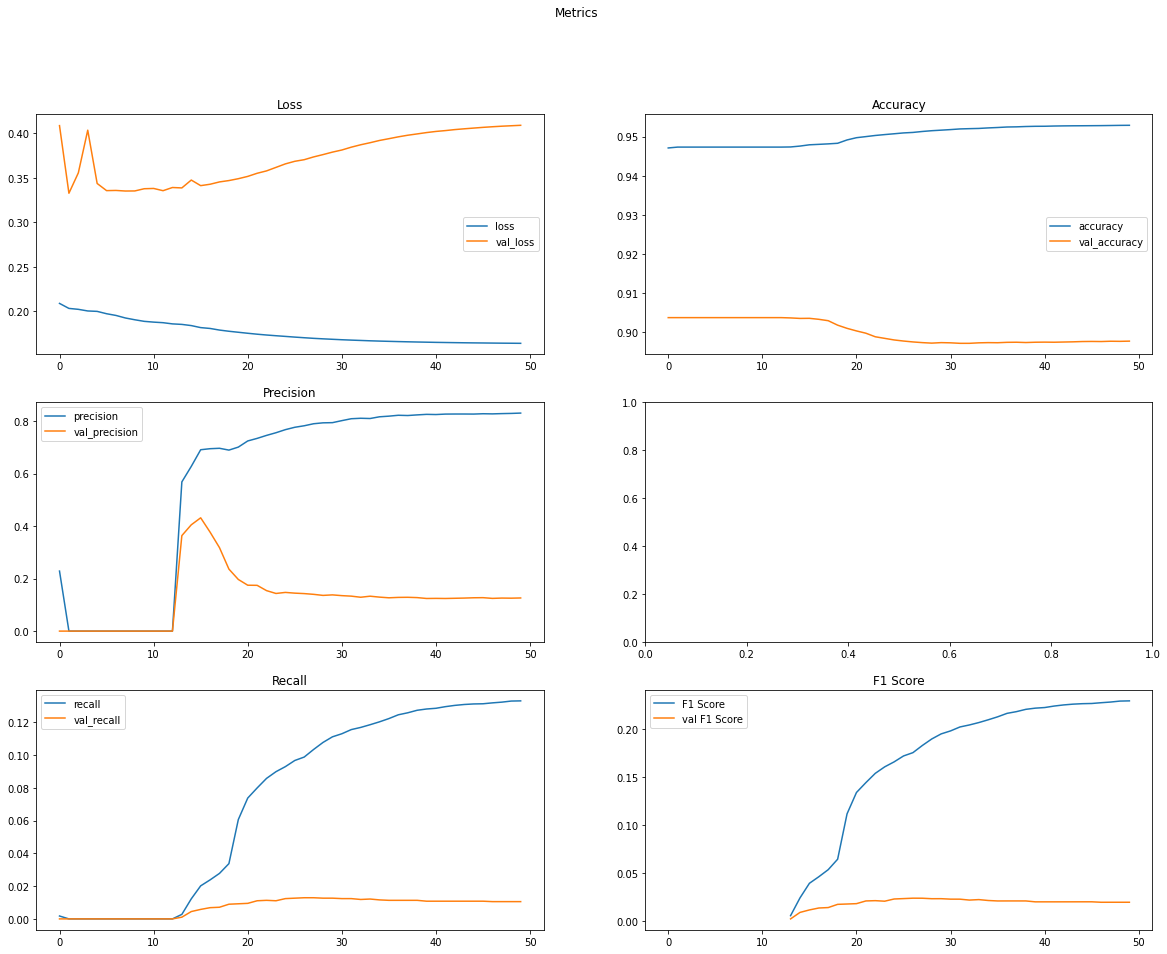

In [80]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['loss', 'val_loss'])
ax1.set_title('Loss')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['accuracy', 'val_accuracy'])
ax2.set_title('Accuracy')

ax3.plot(history.history['precision'])
ax3.plot(history.history['val_precision'])
ax3.legend(['precision', 'val_precision'])
ax3.set_title('Precision')

ax5.plot(history.history['recall'])
ax5.plot(history.history['val_recall'])
ax5.legend(['recall', 'val_recall'])
ax5.set_title('Recall')


ax6.plot(f1)
ax6.plot(val_f1)
ax6.legend(['F1 Score', 'val F1 Score'])
ax6.set_title('F1 Score')

fig.suptitle('Metrics')
plt.show()